In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
% matplotlib inline
import seaborn as sb
import warnings
warnings.filterwarnings("ignore")

In [3]:
pub_train = pd.read_csv("train_V2.csv")
pub_test = pd.read_csv("test_V2.csv")
sub = pd.read_csv("sample_submission_V2.csv")

In [54]:
#to reset variable space    %reset

Once deleted, variables cannot be recovered. Proceed (y/[n])? y


In [3]:
print(list(pub_train))
print(list(pub_test))

['Id', 'groupId', 'matchId', 'assists', 'boosts', 'damageDealt', 'DBNOs', 'headshotKills', 'heals', 'killPlace', 'killPoints', 'kills', 'killStreaks', 'longestKill', 'matchDuration', 'matchType', 'maxPlace', 'numGroups', 'rankPoints', 'revives', 'rideDistance', 'roadKills', 'swimDistance', 'teamKills', 'vehicleDestroys', 'walkDistance', 'weaponsAcquired', 'winPoints', 'winPlacePerc']
['Id', 'groupId', 'matchId', 'assists', 'boosts', 'damageDealt', 'DBNOs', 'headshotKills', 'heals', 'killPlace', 'killPoints', 'kills', 'killStreaks', 'longestKill', 'matchDuration', 'matchType', 'maxPlace', 'numGroups', 'rankPoints', 'revives', 'rideDistance', 'roadKills', 'swimDistance', 'teamKills', 'vehicleDestroys', 'walkDistance', 'weaponsAcquired', 'winPoints']


In [ ]:
pub_train.head()

In [5]:
pub_train.shape

(4446966, 29)

In [4]:
pub_test.shape

(1934174, 28)

In [38]:
pub_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1934174 entries, 0 to 1934173
Data columns (total 28 columns):
Id                 object
groupId            object
matchId            object
assists            int64
boosts             int64
damageDealt        float64
DBNOs              int64
headshotKills      int64
heals              int64
killPlace          int64
killPoints         int64
kills              int64
killStreaks        int64
longestKill        float64
matchDuration      int64
matchType          object
maxPlace           int64
numGroups          int64
rankPoints         int64
revives            int64
rideDistance       float64
roadKills          int64
swimDistance       float64
teamKills          int64
vehicleDestroys    int64
walkDistance       float64
weaponsAcquired    int64
winPoints          int64
dtypes: float64(5), int64(19), object(4)
memory usage: 413.2+ MB


lets reduce the memory since its a huge dataset! processing time is very high.<br>
Memory saving function credit to https://www.kaggle.com/gemartin/load-data-reduce-memory-usage

In [5]:
def reduce_mem_usage(df):
    """ iterate through all the columns of a dataframe and modify the data type
        to reduce memory usage.        
    """
    start_mem = df.memory_usage().sum() / 1024**2
    print('Memory usage of dataframe is {:.2f} MB'.format(start_mem))

    for col in df.columns:
        col_type = df[col].dtype

        if col_type != object:
            c_min = df[col].min()
            c_max = df[col].max()
            if str(col_type)[:3] == 'int':
                if c_min > np.iinfo(np.int8).min and c_max < np.iinfo(np.int8).max:
                    df[col] = df[col].astype(np.int8)
                elif c_min > np.iinfo(np.int16).min and c_max < np.iinfo(np.int16).max:
                    df[col] = df[col].astype(np.int16)
                elif c_min > np.iinfo(np.int32).min and c_max < np.iinfo(np.int32).max:
                    df[col] = df[col].astype(np.int32)
                elif c_min > np.iinfo(np.int64).min and c_max < np.iinfo(np.int64).max:
                    df[col] = df[col].astype(np.int64)  
            else:
                if c_min > np.finfo(np.float16).min and c_max < np.finfo(np.float16).max:
                    df[col] = df[col].astype(np.float16)
                elif c_min > np.finfo(np.float32).min and c_max < np.finfo(np.float32).max:
                    df[col] = df[col].astype(np.float32)
                else:
                    df[col] = df[col].astype(np.float64)

    end_mem = df.memory_usage().sum() / 1024**2
    print('Memory usage after optimization is: {:.2f} MB'.format(end_mem))
    print('Decreased by {:.1f}%'.format(100 * (start_mem - end_mem) / start_mem))

    return df
df_train = reduce_mem_usage(pub_train)
df_test = reduce_mem_usage(pub_test)


Memory usage of dataframe is 983.90 MB
Memory usage after optimization is: 288.39 MB
Decreased by 70.7%
Memory usage of dataframe is 413.18 MB
Memory usage after optimization is: 121.74 MB
Decreased by 70.5%


In [22]:
df_train.head()

,Id,groupId,matchId,assists,boosts,damageDealt,DBNOs,headshotKills,heals,killPlace,...,revives,rideDistance,roadKills,swimDistance,teamKills,vehicleDestroys,walkDistance,weaponsAcquired,winPoints,winPlacePerc
0,0,24,0,0,5,247.25000,2,0,4,17,...,1,591.5,0,0.0,0,0,782.500000,4,1458,0.856934
1,1,440875,1,1,0,37.65625,1,1,0,45,...,0,0.0,0,0.0,0,0,119.625000,3,1511,0.040009
2,2,878242,2,0,1,93.75000,1,0,2,54,...,1,0.0,0,0.0,0,0,3248.000000,5,1583,0.740723
3,3,1319841,3,0,0,95.87500,0,0,0,86,...,0,0.0,0,0.0,0,0,21.484375,1,1489,0.114624
4,4,1757883,4,0,1,0.00000,0,0,1,58,...,0,0.0,0,0.0,0,0,641.000000,4,1475,0.521484


In [3]:
df_train.info()

NameError: name 'df_train' is not defined

lets describe the Data

   __groupId__ - Integer ID to identify a group within a match. If the same group of players plays in different matches, they will have a different groupId each time.
    __matchId__ - Integer ID to identify match. There are no matches that are in both the training and testing set.<br>
    __assists__ - Number of enemy players this player damaged that were killed by teammates.<br>
    __boosts__ - Number of boost items used.<br>
    __damageDealt__ - Total damage dealt. Note: Self inflicted damage is subtracted.<br>
    __DBNOs__ - Number of enemy players knocked.<br>
    __headshotKills__ - Number of enemy players killed with headshots.<br>
    __heals__ - Number of healing items used.<br>
    __killPlace__ - Ranking in match of number of enemy players killed.<br>
    __killPoints__ - Kills-based external ranking of player. (Think of this as an Elo ranking where only kills matter.)<br>
    __kills__ - Number of enemy players killed.<br>
    __killStreaks__ - Max number of enemy players killed in a short amount of time.<br>
    __longestKill__ - Longest distance between player and player killed at time of death. This may be misleading, as downing a - player and driving away may lead to a large longestKill stat.<br>
    __maxPlace__ - Worst placement we have data for in the match. This may not match with numGroups, as sometimes the data skips over placements.<br>
    __numGroups__ - Number of groups we have data for in the match.<br>
    __revives__ - Number of times this player revived teammates.<br>
    __rideDistance__ - Total distance traveled in vehicles measured in meters.<br>
    __roadKills__ - Number of kills while in a vehicle.<br>
    __swimDistance__ - Total distance traveled by swimming measured in meters.<br>
    __teamKills__ - Number of times this player killed a teammate.<br>
    __vehicleDestroys__ - Number of vehicles destroyed.<br>
    __walkDistance__ - Total distance traveled on foot measured in meters.<br>
    __weaponsAcquired__ - Number of weapons picked up.<br>
    __winPoints__ - Win-based external ranking of player. (Think of this as an Elo ranking where only winning matters.)<br>
    __winPlacePerc__ - The target of prediction. This is a percentile winning placement, where 1 corresponds to 1st place, and 0 corresponds to last place in the match. It is calculated off of maxPlace, not numGroups, so it is possible to have missing chunks in a match.<br>



Lets Check for missing value both test and train

In [24]:
df_train.isna().sum()

Id                 0
groupId            0
matchId            0
assists            0
boosts             0
damageDealt        0
DBNOs              0
headshotKills      0
heals              0
killPlace          0
killPoints         0
kills              0
killStreaks        0
longestKill        0
maxPlace           0
numGroups          0
revives            0
rideDistance       0
roadKills          0
swimDistance       0
teamKills          0
vehicleDestroys    0
walkDistance       0
weaponsAcquired    0
winPoints          0
winPlacePerc       0
dtype: int64

In [25]:
df_test.isna().sum()

Id                 0
groupId            0
matchId            0
assists            0
boosts             0
damageDealt        0
DBNOs              0
headshotKills      0
heals              0
killPlace          0
killPoints         0
kills              0
killStreaks        0
longestKill        0
maxPlace           0
numGroups          0
revives            0
rideDistance       0
roadKills          0
swimDistance       0
teamKills          0
vehicleDestroys    0
walkDistance       0
weaponsAcquired    0
winPoints          0
dtype: int64

univariate Analysis on data
1. damageDealt

In [5]:
print('Max damage:', pub_train['damageDealt'].max())
print('95% percentile:', np.percentile(pub_train['damageDealt'], 95))
print('99% percentile:', np.percentile(pub_train['damageDealt'], 99))
print('{0:.4f}% players dealt zero damage'.format((pub_train['damageDealt'] == 0).sum()/ pub_train.shape[0]))

Max damage: 6616.0
95% percentile: 459.1
99% percentile: 776.2
0.2784% players dealt zero damage


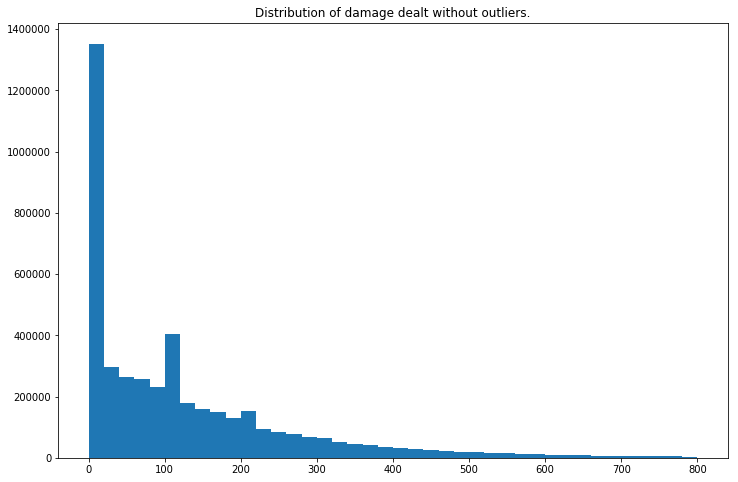

In [6]:
plt.figure(figsize=(12, 8))
plt.hist(pub_train.loc[pub_train['damageDealt'] <= 800, 'damageDealt'], bins=40);
plt.title('Distribution of damage dealt without outliers.');

lets check for distribution of No of Kills

Distribution of number of kills
Max number of kills: 53
95% percentile: 3.0
99% percentile: 5.0
0.6237% players killed noone


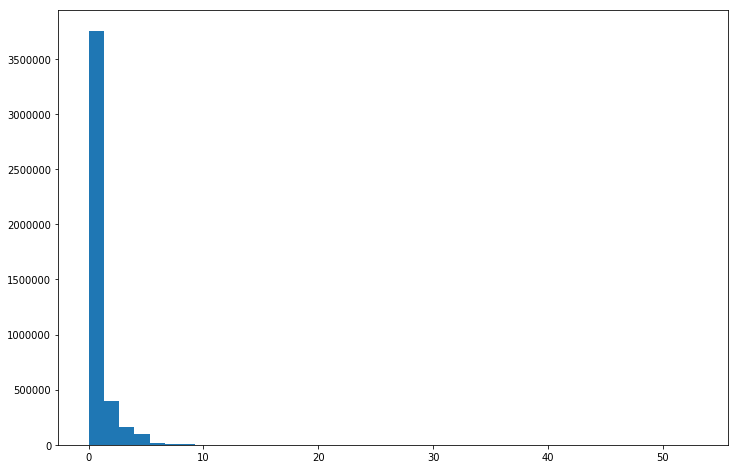

In [7]:
print('Distribution of number of kills')
print('Max number of kills:', pub_train['DBNOs'].max())
print('95% percentile:', np.percentile(pub_train['DBNOs'], 95))
print('99% percentile:', np.percentile(pub_train['DBNOs'], 99))
print('{0:.4f}% players killed noone'.format((pub_train['DBNOs'] == 0).sum()/ pub_train.shape[0]))
plt.figure(figsize=(12,8))
plt.hist(pub_train['DBNOs'], bins=40);

# Distance Travelled and road kills

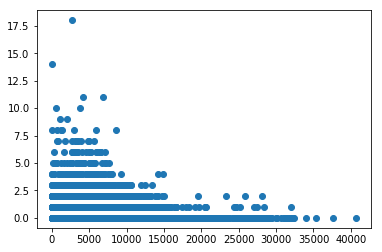

In [42]:
plt.scatter(x=pub_train['rideDistance'], y=pub_train['roadKills']);

# Lets check the distribution of Target variable

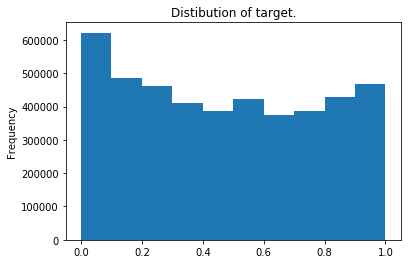

In [43]:
pub_train['winPlacePerc'].plot(kind='hist');
plt.title('Distibution of target.');

Distribution of killPlace

Text(0.5,1,'Distribution of kill place.')

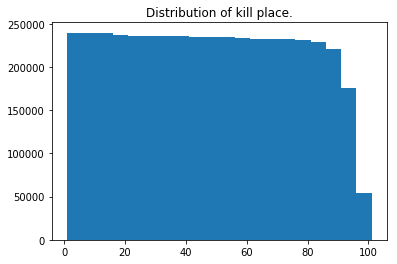

In [44]:
plt.hist(pub_train['killPlace'], bins=20);
plt.title('Distribution of kill place.')

In [ ]:
8:17AM

## Lets Analyze Kills
### Longest kill
which is in meters

In [46]:

pub_train.longestKill.max()

1094.0

In [47]:
pub_train.groupby('Id')['longestKill'].max().sort_values(ascending=False).head(20)

Id
1f5ba6e0cfb968    1094.0
1ff9763ca30279    1081.0
4e7e6c74e3c57d    1075.0
f4082eee4c45e9    1072.0
4b9f61bac5eb0a    1071.0
f19a76e8d7ac52    1059.0
24e0fec84c18e9    1052.0
d8857d3d7e31b6    1040.0
303a93cfa1f46c    1037.0
5ff0c1a9fab2ba    1037.0
42df3102cb540b    1033.0
ef390c152bcc3d    1026.0
0040e53dfe7b5d    1023.0
db638834c62f6f    1017.0
d0c286ce498e17    1011.0
91966848e08e2f    1005.0
ba51dd0a1611c0    1004.0
41c2f5c0699807    1004.0
7f77051c7cef52    1003.0
5524c154448425    1002.0
Name: longestKill, dtype: float64

How many Kills does 99th percent of Players have?

In [48]:
pub_train['kills'].quantile(0.9999)

21.0

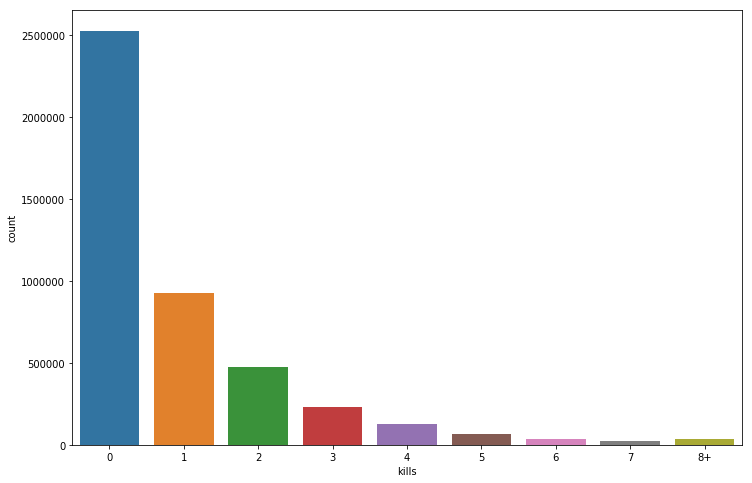

In [49]:
data=pub_train.copy()
plt.figure(figsize=(12,8))
data.loc[data['kills'] > data['kills'].quantile(0.99)] = '8+'
sb.countplot(data['kills'].astype('str').sort_values())

what is the highest Kill a player got in a game ?

In [51]:
pub_train['kills'].max()

72

In [52]:
pub_train.groupby(['matchType']).sum()

,assists,boosts,damageDealt,DBNOs,headshotKills,heals,killPlace,killPoints,kills,killStreaks,...,revives,rideDistance,roadKills,swimDistance,teamKills,vehicleDestroys,walkDistance,weaponsAcquired,winPoints,winPlacePerc
matchType,,,,,,,,,,,,,,,,,,,,,
crashfpp,1206,7112,5.659944e+05,2847,475,7590,282575,0,4898,3249,...,367,1.188601e+07,1967,9.704080e+03,460,491,4.206751e+06,9547,0,2984.5077
crashtpp,90,410,3.781696e+04,178,21,349,14253,0,327,214,...,11,4.833433e+05,136,1.093400e+02,14,25,2.686830e+05,618,0,179.7552
duo,67007,355451,3.961344e+07,191464,66662,419895,14866929,138966019,284730,170988,...,47628,2.359364e+08,1336,1.508740e+06,8212,3271,3.523610e+08,1166290,181285609,151394.4707
duo-fpp,215092,1074455,1.318119e+08,626514,224264,1324426,47481228,484040959,923022,564868,...,161330,5.445662e+08,2013,4.164234e+06,19305,5833,1.100716e+09,3552530,590234153,484193.9075
flarefpp,200,945,9.940055e+04,640,147,1318,29843,0,636,390,...,167,9.502779e+05,6,2.170912e+03,32,16,1.075246e+06,3212,0,324.1445
flaretpp,712,3418,3.215501e+05,2147,481,4611,110585,284000,2148,1267,...,589,4.034649e+06,27,1.696412e+04,137,78,3.613479e+06,10887,426000,1088.6513
normal-duo,230,214,8.795689e+04,489,184,549,2132,132000,762,188,...,74,2.688772e+05,6,1.864900e+02,7,4,2.412142e+05,2116,198000,102.4165
normal-duo-fpp,3346,9270,1.394153e+06,4815,2596,12654,139983,3696000,10737,3746,...,974,9.646697e+06,53,4.116934e+04,116,97,8.881362e+06,36624,5544000,2789.3730
normal-solo,569,264,2.607491e+05,0,626,804,3483,221000,2448,449,...,0,1.301357e+05,0,6.456000e+02,24,0,3.062265e+05,5959,331500,183.1833


In [49]:
list(df_train)

['Id',
 'groupId',
 'matchId',
 'assists',
 'boosts',
 'damageDealt',
 'DBNOs',
 'headshotKills',
 'heals',
 'killPlace',
 'killPoints',
 'kills',
 'killStreaks',
 'longestKill',
 'maxPlace',
 'numGroups',
 'revives',
 'rideDistance',
 'roadKills',
 'swimDistance',
 'teamKills',
 'vehicleDestroys',
 'walkDistance',
 'weaponsAcquired',
 'winPoints',
 'winPlacePerc']

To Plot win placement percentage vs kills.

In [1]:
sb.jointplot(x="winPlacePerc", y="kills", data=pub_train,ratio=3, color="r")
plt.show()

NameError: name 'sb' is not defined

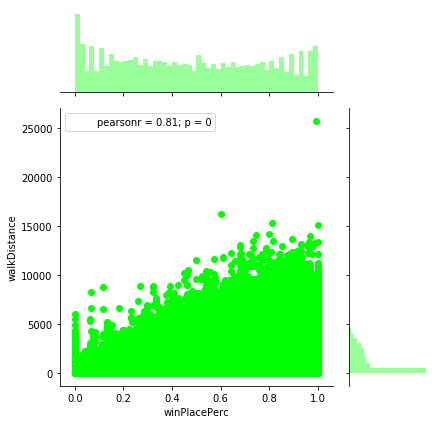

In [8]:
sb.jointplot(x="winPlacePerc", y="walkDistance",  data=pub_train, ratio=3, color="lime")
plt.show()

Apparently walking has a high correlation with winPlacePerc.

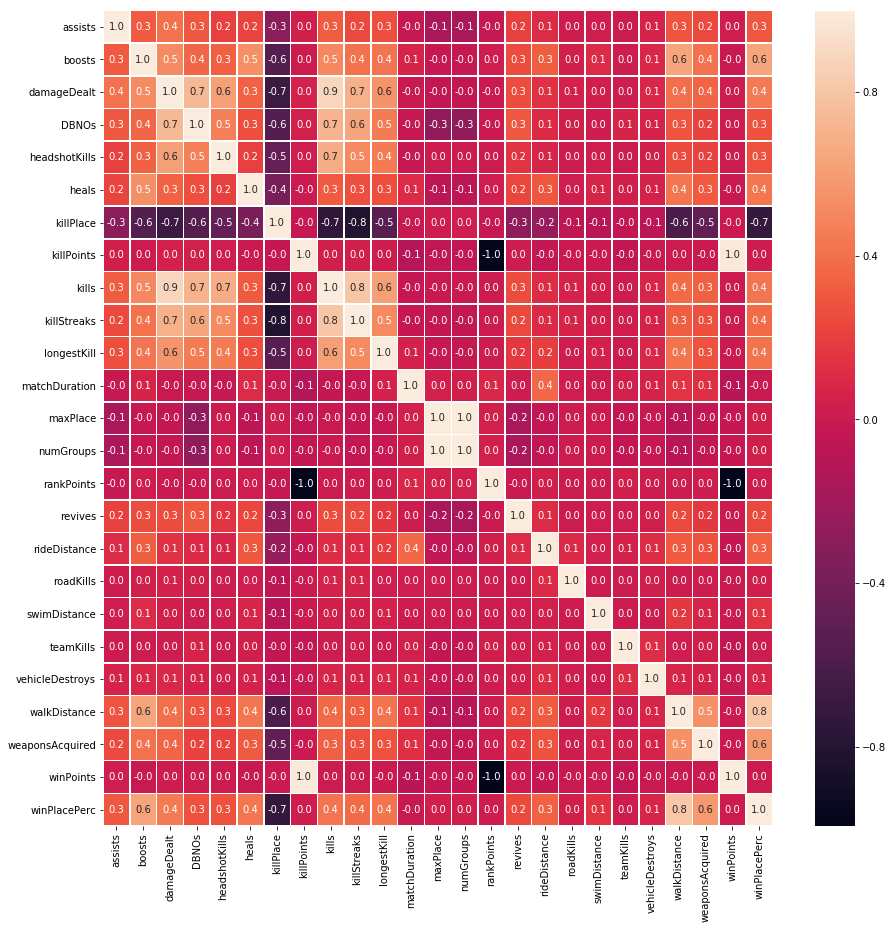

In [67]:
f,ax = plt.subplots(figsize=(15, 15))
sb.heatmap(df_train.corr(), annot=True, linewidths=.5, fmt= '.1f',ax=ax)
plt.show()

class in python

To find correlation between winPlaceperc and Independent variables

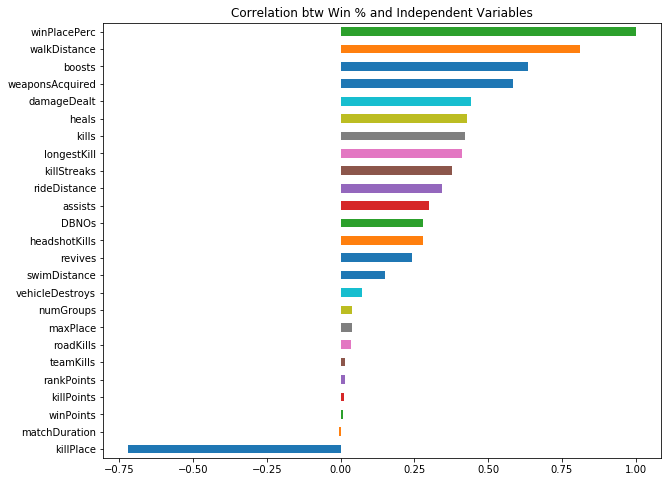

In [8]:
plt.title("Correlation btw Win % and Independent Variables")
df_train.corr()['winPlacePerc'].sort_values().plot(kind='barh',figsize=(10,8))

# lets find distance travelled using pie chart

([<matplotlib.patches.Wedge at 0x1a86f96780>,
 [Text(-0.973745,-0.511685,'Walking'),
  Text(1.06671,0.549657,'Riding'),
  Text(0.00882977,1.09996,'Swimming')],
 [Text(-0.531134,-0.279101,'65.4%'),
  Text(0.62225,0.320633,'34.3%'),
  Text(0.00481624,0.599981,'0.3%')])

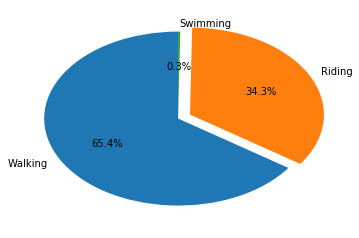

In [28]:
travel_values=pub_train[['walkDistance','rideDistance','swimDistance']].sum()
plt.pie(travel_values, explode=[0,0.1,0],
        labels=['Walking','Riding','Swimming'], autopct='%1.1f%%',startangle=90)



In [32]:
df_train.iloc[:5,]

,Id,groupId,matchId,assists,boosts,damageDealt,DBNOs,headshotKills,heals,killPlace,...,revives,rideDistance,roadKills,swimDistance,teamKills,vehicleDestroys,walkDistance,weaponsAcquired,winPoints,winPlacePerc
0,7f96b2f878858a,4d4b580de459be,a10357fd1a4a91,0,0,0.00000,0,0,0,60,...,0,0.000000,0,0.000000,0,0,244.75,1,1466,0.444336
1,eef90569b9d03c,684d5656442f9e,aeb375fc57110c,0,0,91.50000,0,0,0,57,...,0,0.004501,0,11.039062,0,0,1434.00,5,0,0.640137
2,1eaf90ac73de72,6a4a42c3245a74,110163d8bb94ae,1,0,68.00000,0,0,0,47,...,0,0.000000,0,0.000000,0,0,161.75,2,0,0.775391
3,4616d365dd2853,a930a9c79cd721,f1f1f4ef412d7e,0,0,32.90625,0,0,0,75,...,0,0.000000,0,0.000000,0,0,202.75,3,0,0.166748
4,315c96c26c9aac,de04010b3458dd,6dc8ff871e21e6,0,0,100.00000,0,0,0,45,...,0,0.000000,0,0.000000,0,0,49.75,2,0,0.187500


In [55]:
pd.unique(df_train.matchType).tolist()

['squad-fpp',
 'duo',
 'solo-fpp',
 'squad',
 'duo-fpp',
 'solo',
 'normal-squad-fpp',
 'crashfpp',
 'flaretpp',
 'normal-solo-fpp',
 'flarefpp',
 'normal-duo-fpp',
 'normal-duo',
 'normal-squad',
 'crashtpp',
 'normal-solo']

In [60]:
df_train.groupby('matchType')['Id'].count()

matchType
crashfpp               6287
crashtpp                371
duo                  313591
duo-fpp              996691
flarefpp                718
flaretpp               2505
normal-duo              199
normal-duo-fpp         5489
normal-solo             326
normal-solo-fpp        1682
normal-squad            516
normal-squad-fpp      17174
solo                 181943
solo-fpp             536762
squad                626526
squad-fpp           1756186
Name: Id, dtype: int64

### Feature Engineering
<br> 1. playerJoined column

In [4]:
combine = [pub_train,pub_test]

In [5]:
print(pub_test.shape,pub_train.shape)

(1934174, 28) (4446966, 29)


In [6]:
for df in combine:
    df['playerJoined'] = df.groupby('matchId')['matchId'].transform('count')

In [7]:
pub_train.head()

,Id,groupId,matchId,assists,boosts,damageDealt,DBNOs,headshotKills,heals,killPlace,...,rideDistance,roadKills,swimDistance,teamKills,vehicleDestroys,walkDistance,weaponsAcquired,winPoints,winPlacePerc,playerJoined
0,7f96b2f878858a,4d4b580de459be,a10357fd1a4a91,0,0,0.00,0,0,0,60,...,0.0000,0,0.00,0,0,244.80,1,1466,0.4444,96
1,eef90569b9d03c,684d5656442f9e,aeb375fc57110c,0,0,91.47,0,0,0,57,...,0.0045,0,11.04,0,0,1434.00,5,0,0.6400,91
2,1eaf90ac73de72,6a4a42c3245a74,110163d8bb94ae,1,0,68.00,0,0,0,47,...,0.0000,0,0.00,0,0,161.80,2,0,0.7755,98
3,4616d365dd2853,a930a9c79cd721,f1f1f4ef412d7e,0,0,32.90,0,0,0,75,...,0.0000,0,0.00,0,0,202.70,3,0,0.1667,91
4,315c96c26c9aac,de04010b3458dd,6dc8ff871e21e6,0,0,100.00,0,0,0,45,...,0.0000,0,0.00,0,0,49.75,2,0,0.1875,97


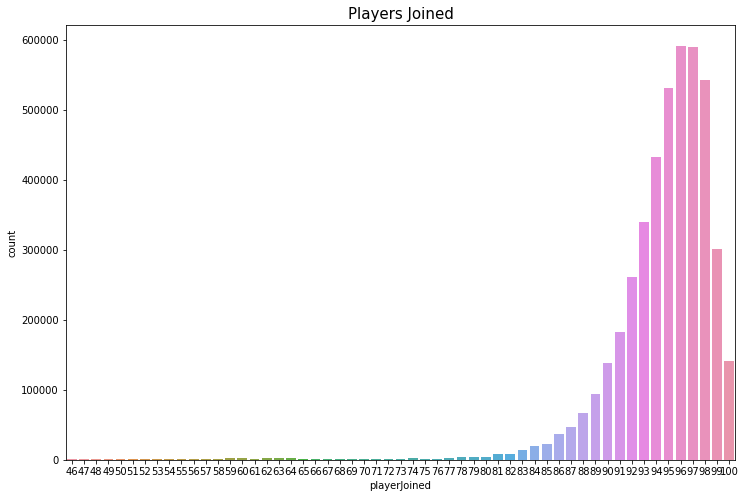

In [9]:
data = pub_train.copy()
data = data[data['playerJoined'] > 45]
plt.figure(figsize = (12,8))
sb.countplot(data['playerJoined'])
plt.title("Players Joined",fontsize = 15)
plt.show()

Based on the "playersJoined" feature we can create (or change) a lot of others to normalize their values. For example i will create the "killsNorm" and "damageDealtNorm" features. When there are 100 players in the game it might be easier to find and kill someone, than when there are 90 players. So i will normalize the kills in a way that a kill in 100 players will score 1 (as it is) and in 90 players it will score (100-90)/100 + 1 = 1.1. This is just an assumption. You can use different scales.

In [8]:
for df in combine:
    df['killsNorm'] = df['kills']*((100-df['playerJoined'])/100 + 1)
    df['damageDealtNorm'] = df['damageDealt']*((100-df['playerJoined'])/100 + 1)
pub_train[['playerJoined', 'kills', 'killsNorm', 'damageDealt', 'damageDealtNorm']][5:8]

,playerJoined,kills,killsNorm,damageDealt,damageDealtNorm
5,95,1,1.05,100.000,105.00000
6,97,0,0.00,0.000,0.00000
7,96,0,0.00,8.538,8.87952


To sum up heals and boosts<br>
and make 'totalDistance' as one feature

In [9]:
for df in combine:
    df['healsNboosts'] = df['heals']+ df['boosts']
    df['totalDistance'] = df['walkDistance'] + df['swimDistance'] + df['rideDistance']

In [10]:
pub_train[['heals','boosts','healsNboosts','walkDistance','swimDistance','rideDistance','totalDistance']][460:465]

,heals,boosts,healsNboosts,walkDistance,swimDistance,rideDistance,totalDistance
460,0,0,0,211.0,0.00,0.0,211.00
461,15,4,19,3365.0,4.39,4496.0,7865.39
462,2,3,5,2591.0,0.00,2464.0,5055.00
463,8,1,9,545.1,0.00,0.0,545.10
464,0,0,0,112.1,0.00,0.0,112.10


In [117]:
pub_train.head(5)

,Id,groupId,matchId,assists,boosts,damageDealt,DBNOs,headshotKills,heals,killPlace,killPoints,kills,killStreaks,longestKill,matchDuration,matchType,maxPlace,numGroups,rankPoints,revives,rideDistance,roadKills,swimDistance,teamKills,vehicleDestroys,walkDistance,weaponsAcquired,winPoints,winPlacePerc,playerJoined,killsNorm,damageDealtNorm,healsNboosts,totalDistance,boostsPerWalkDistance,healsPerWalkDistance,healsAndBoostsPerWalkDistance
0,7f96b2f878858a,4d4b580de459be,a10357fd1a4a91,0,0,0.00,0,0,0,60,1241,0,0,0.00,1306,squad-fpp,28,26,-1,0,0.0000,0,0.00,0,0,244.80,1,1466,0.4444,96,0.00,0.0000,0,244.8000,0.0,0.0,0.0
1,eef90569b9d03c,684d5656442f9e,aeb375fc57110c,0,0,91.47,0,0,0,57,0,0,0,0.00,1777,squad-fpp,26,25,1484,0,0.0045,0,11.04,0,0,1434.00,5,0,0.6400,91,0.00,99.7023,0,1445.0445,0.0,0.0,0.0
2,1eaf90ac73de72,6a4a42c3245a74,110163d8bb94ae,1,0,68.00,0,0,0,47,0,0,0,0.00,1318,duo,50,47,1491,0,0.0000,0,0.00,0,0,161.80,2,0,0.7755,98,0.00,69.3600,0,161.8000,0.0,0.0,0.0
3,4616d365dd2853,a930a9c79cd721,f1f1f4ef412d7e,0,0,32.90,0,0,0,75,0,0,0,0.00,1436,squad-fpp,31,30,1408,0,0.0000,0,0.00,0,0,202.70,3,0,0.1667,91,0.00,35.8610,0,202.7000,0.0,0.0,0.0
4,315c96c26c9aac,de04010b3458dd,6dc8ff871e21e6,0,0,100.00,0,0,0,45,0,1,1,58.53,1424,solo-fpp,97,95,1560,0,0.0000,0,0.00,0,0,49.75,2,0,0.1875,97,1.03,103.0000,0,49.7500,0.0,0.0,0.0


When using boosting items you run faster. They also help staying out of the zone (PUBG term) and loot more (meaning walking more). So lets create a feature boosts per walking distance. Heals don't make you run faster, but they also help staying out of the zone and loot more. So lets create the same feature for heals also.

In [11]:
for df in combine:
    df['boostsPerWalkDistance'] = df['boosts']/(df['walkDistance']+1) #The +1 is to avoid infinity, because there are entries where boosts>0 and walkDistance=0. Strange.
    df['boostsPerWalkDistance'].fillna(0, inplace=True)
    df['healsPerWalkDistance'] = df['heals']/(df['walkDistance']+1) #The +1 is to avoid infinity, because there are entries where heals>0 and walkDistance=0. Strange.
    df['healsPerWalkDistance'].fillna(0, inplace=True)
    df['healsAndBoostsPerWalkDistance'] = df['healsNboosts']/(df['walkDistance']+1) #The +1 is to avoid infinity.
    df['healsAndBoostsPerWalkDistance'].fillna(0, inplace=True)

pub_train[['walkDistance', 'boosts', 'boostsPerWalkDistance' ,'heals',  'healsPerWalkDistance', 'healsNboosts', 'healsAndBoostsPerWalkDistance']][40:45]

,walkDistance,boosts,boostsPerWalkDistance,heals,healsPerWalkDistance,healsNboosts,healsAndBoostsPerWalkDistance
40,327.30,1,0.003046,1,0.003046,2,0.006092
41,128.80,0,0.000000,0,0.000000,0,0.000000
42,52.52,0,0.000000,0,0.000000,0,0.000000
43,534.10,1,0.001869,0,0.000000,1,0.001869
44,2576.00,4,0.001552,6,0.002328,10,0.003880


Creating match_mean and match_median column

In [12]:
pub_train = pub_train.assign(match_mean=pub_train.groupby('matchId').winPlacePerc.transform('mean'))
pub_train = pub_train.assign(match_median = pub_train.groupby('matchId').winPlacePerc.transform('median'))

In [13]:
pub_train[['match_mean','match_median']][1:5]

,match_mean,match_median
1,0.456703,0.4000
2,0.456686,0.4184
3,0.495240,0.5000
4,0.499140,0.5000


Team size and game sizes are not given metrics but they can be easily derived from the groupid and matchid.

In [14]:
pub_train = pub_train.assign(team_size=pub_train.groupby('groupId').groupId.transform('count'))
pub_train = pub_train.assign(max_team_size=pub_train.groupby('matchId').team_size.transform('max'))
pub_train = pub_train.assign(match_size=pub_train.groupby('matchId').Id.transform('nunique'))

In [15]:
pub_train[['team_size','max_team_size','match_size']][200:205]

,team_size,max_team_size,match_size
200,4,10,95
201,2,3,97
202,1,2,100
203,4,4,90
204,4,7,98


In [16]:
pub_test = pub_test.assign(team_size=pub_test.groupby('groupId').groupId.transform('count'))
pub_test = pub_test.assign(max_team_size=pub_test.groupby('matchId').team_size.transform('max'))
pub_test = pub_test.assign(match_size=pub_test.groupby('matchId').Id.transform('nunique'))

In [17]:
pub_train =  pub_train.assign(team_indicator = pub_train.team_size.apply(lambda x: 5 if x>= 5 else x))
pub_test =  pub_test.assign(team_indicator = pub_test.team_size.apply(lambda x: 5 if x>= 5 else x))

In [18]:
pub_train['team_indicator'][1:5]

1    4
2    2
3    1
4    1
Name: team_indicator, dtype: int64

The new fields represent the team size densities per game.

In [19]:
pub_train = pd.get_dummies(pub_train, columns=['team_indicator'])
dummy_cols = ['team_indicator_{}'.format(i) for i in np.arange(1,6)]
pub_train[dummy_cols] = pub_train.groupby('matchId')[dummy_cols].transform('mean')


In [20]:
pub_test = pd.get_dummies(pub_test, columns=['team_indicator'])
dummy_cols = ['team_indicator_{}'.format(i) for i in np.arange(1,6)]
pub_test[dummy_cols] = pub_test.groupby('matchId')[dummy_cols].transform('mean')

In [21]:
pub_test[['team_indicator_1','team_indicator_2','team_indicator_3','team_indicator_4','team_indicator_5']][1:5]

,team_indicator_1,team_indicator_2,team_indicator_3,team_indicator_4,team_indicator_5
1,0.020833,0.875000,0.062500,0.041667,0.000000
2,0.021277,0.042553,0.255319,0.510638,0.170213
3,0.022472,0.876404,0.101124,0.000000,0.000000
4,0.021053,0.063158,0.315789,0.336842,0.263158


Now to categorize into different game modes using team_indicator columns

In [22]:
pub_train.loc[pub_train.team_indicator_1 >= 0.7, 'game_mode'] = 'solo'
pub_train.loc[pub_train.team_indicator_2 >= 0.6, 'game_mode'] = 'duo'
pub_train.loc[(pub_train.team_indicator_3 + pub_train.team_indicator_4) >= 0.5, 'game_mode'] = 'squad'

pub_train.game_mode = np.where((pub_train.team_indicator_5 >= 0.2), 'custom', pub_train.game_mode)

In [23]:
pub_test.loc[pub_test.team_indicator_1 >= 0.7, 'game_mode'] = 'solo'
pub_test.loc[pub_test.team_indicator_2 >= 0.6, 'game_mode'] = 'duo'
pub_test.loc[(pub_test.team_indicator_3 + pub_test.team_indicator_4) >= 0.5, 'game_mode'] = 'squad'

pub_test.game_mode = np.where((pub_test.team_indicator_5 >= 0.2), 'custom', pub_test.game_mode)

In [24]:
pub_test.head()

,Id,groupId,matchId,assists,boosts,damageDealt,DBNOs,headshotKills,heals,killPlace,...,healsAndBoostsPerWalkDistance,team_size,max_team_size,match_size,team_indicator_1,team_indicator_2,team_indicator_3,team_indicator_4,team_indicator_5,game_mode
0,9329eb41e215eb,676b23c24e70d6,45b576ab7daa7f,0,0,51.46,0,0,0,73,...,0.000000,4,9,92,0.043478,0.086957,0.260870,0.391304,0.217391,custom
1,639bd0dcd7bda8,430933124148dd,42a9a0b906c928,0,4,179.10,0,0,2,11,...,0.002973,2,4,96,0.020833,0.875000,0.062500,0.041667,0.000000,duo
2,63d5c8ef8dfe91,0b45f5db20ba99,87e7e4477a048e,1,0,23.40,0,0,4,49,...,0.005071,4,6,94,0.021277,0.042553,0.255319,0.510638,0.170213,squad
3,cf5b81422591d1,b7497dbdc77f4a,1b9a94f1af67f1,0,0,65.52,0,0,0,54,...,0.000000,2,3,89,0.022472,0.876404,0.101124,0.000000,0.000000,duo
4,ee6a295187ba21,6604ce20a1d230,40754a93016066,0,4,330.20,1,2,1,7,...,0.001687,3,8,95,0.021053,0.063158,0.315789,0.336842,0.263158,custom


Adding more features

In [25]:
pub_train['max_possible_kills'] = pub_train.match_size - pub_train.team_size

In [26]:
pub_test['max_possible_kills'] = pub_test.match_size - pub_test.team_size

In [27]:
pd.set_option('display.max_columns', None)  
pd.set_option('display.expand_frame_repr', False)
pd.set_option('max_colwidth', -1)

In [28]:
pub_train.head()

,Id,groupId,matchId,assists,boosts,damageDealt,DBNOs,headshotKills,heals,killPlace,killPoints,kills,killStreaks,longestKill,matchDuration,matchType,maxPlace,numGroups,rankPoints,revives,rideDistance,roadKills,swimDistance,teamKills,vehicleDestroys,walkDistance,weaponsAcquired,winPoints,winPlacePerc,playerJoined,killsNorm,damageDealtNorm,healsNboosts,totalDistance,boostsPerWalkDistance,healsPerWalkDistance,healsAndBoostsPerWalkDistance,match_mean,match_median,team_size,max_team_size,match_size,team_indicator_1,team_indicator_2,team_indicator_3,team_indicator_4,team_indicator_5,game_mode,max_possible_kills
0,7f96b2f878858a,4d4b580de459be,a10357fd1a4a91,0,0,0.00,0,0,0,60,1241,0,0,0.00,1306,squad-fpp,28,26,-1,0,0.0000,0,0.00,0,0,244.80,1,1466,0.4444,96,0.00,0.0000,0,244.8000,0.0,0.0,0.0,0.468364,0.4444,4,8,96,0.020833,0.062500,0.187500,0.416667,0.312500,custom,92
1,eef90569b9d03c,684d5656442f9e,aeb375fc57110c,0,0,91.47,0,0,0,57,0,0,0,0.00,1777,squad-fpp,26,25,1484,0,0.0045,0,11.04,0,0,1434.00,5,0,0.6400,91,0.00,99.7023,0,1445.0445,0.0,0.0,0.0,0.456703,0.4000,4,10,91,0.043956,0.021978,0.230769,0.351648,0.351648,custom,87
2,1eaf90ac73de72,6a4a42c3245a74,110163d8bb94ae,1,0,68.00,0,0,0,47,0,0,0,0.00,1318,duo,50,47,1491,0,0.0000,0,0.00,0,0,161.80,2,0,0.7755,98,0.00,69.3600,0,161.8000,0.0,0.0,0.0,0.456686,0.4184,2,6,98,0.061224,0.693878,0.183673,0.000000,0.061224,duo,96
3,4616d365dd2853,a930a9c79cd721,f1f1f4ef412d7e,0,0,32.90,0,0,0,75,0,0,0,0.00,1436,squad-fpp,31,30,1408,0,0.0000,0,0.00,0,0,202.70,3,0,0.1667,91,0.00,35.8610,0,202.7000,0.0,0.0,0.0,0.495240,0.5000,1,8,91,0.054945,0.175824,0.263736,0.131868,0.373626,custom,90
4,315c96c26c9aac,de04010b3458dd,6dc8ff871e21e6,0,0,100.00,0,0,0,45,0,1,1,58.53,1424,solo-fpp,97,95,1560,0,0.0000,0,0.00,0,0,49.75,2,0,0.1875,97,1.03,103.0000,0,49.7500,0.0,0.0,0.0,0.499140,0.5000,1,2,97,0.958763,0.041237,0.000000,0.000000,0.000000,solo,96


In [29]:
pub_train['total_items_acquired'] = pub_train.boosts + pub_train.heals + pub_train.weaponsAcquired
pub_train['items_per_distance'] =  pub_train.total_items_acquired/pub_train.totalDistance
pub_train['kills_per_distance'] = pub_train.kills/pub_train.totalDistance
pub_train['knocked_per_distance'] = pub_train.DBNOs/pub_train.totalDistance
pub_train['damage_per_distance'] = pub_train.damageDealt/pub_train.totalDistance
pub_train['headshot_kill_rate'] = pub_train.headshotKills/pub_train.kills
pub_train['max_kills_by_team'] = pub_train.groupby('groupId').kills.transform('max')
pub_train['total_team_damage'] = pub_train.groupby('groupId').damageDealt.transform('sum')
pub_train['total_team_kills'] =  pub_train.groupby('groupId').kills.transform('sum')
pub_train['total_team_items'] = pub_train.groupby('groupId').total_items_acquired.transform('sum')
pub_train['pct_killed'] = pub_train.kills/pub_train.max_possible_kills
pub_train['pct_knocked'] = pub_train.DBNOs/pub_train.max_possible_kills
pub_train['pct_team_killed'] = pub_train.total_team_kills/pub_train.max_possible_kills
pub_train['team_kill_points'] = pub_train.groupby('groupId').killPoints.transform('sum')
pub_train['team_kill_rank'] = pub_train.groupby('groupId').killPlace.transform('mean')
pub_train['max_kills_match'] = pub_train.groupby('matchId').kills.transform('max')
pub_train['total_kills_match'] = pub_train.groupby('matchId').kills.transform('sum')
pub_train['total_distance_match'] = pub_train.groupby('matchId').totalDistance.sum()
pub_train['map_has_sea'] =  pub_train.groupby('matchId').swimDistance.transform('sum').apply(lambda x: 1 if x>0 else 0)
pub_train.fillna(0, inplace=True)

In [32]:
pub_test['total_items_acquired'] = pub_test.boosts + pub_test.heals + pub_test.weaponsAcquired
pub_test['items_per_distance'] =  pub_test.total_items_acquired/pub_test.totalDistance
pub_test['kills_per_distance'] = pub_test.kills/pub_test.totalDistance
pub_test['knocked_per_distance'] = pub_test.DBNOs/pub_test.totalDistance
pub_test['damage_per_distance'] = pub_test.damageDealt/pub_test.totalDistance
pub_test['headshot_kill_rate'] = pub_test.headshotKills/pub_test.kills
pub_test['max_kills_by_team'] = pub_test.groupby('groupId').kills.transform('max')
pub_test['total_team_damage'] = pub_test.groupby('groupId').damageDealt.transform('sum')
pub_test['total_team_kills'] =  pub_test.groupby('groupId').kills.transform('sum')
pub_test['total_team_items'] = pub_test.groupby('groupId').total_items_acquired.transform('sum')
pub_test['pct_killed'] = pub_test.kills/pub_test.max_possible_kills
pub_test['pct_knocked'] = pub_test.DBNOs/pub_test.max_possible_kills
pub_test['pct_team_killed'] = pub_test.total_team_kills/pub_test.max_possible_kills
pub_test['team_kill_points'] = pub_test.groupby('groupId').killPoints.transform('sum')
pub_test['team_kill_rank'] = pub_test.groupby('groupId').killPlace.transform('mean')
pub_test['max_kills_match'] = pub_test.groupby('matchId').kills.transform('max')
pub_test['total_kills_match'] = pub_test.groupby('matchId').kills.transform('sum')
pub_test['total_distance_match'] = pub_test.groupby('matchId').totalDistance.sum()
pub_test['map_has_sea'] =  pub_test.groupby('matchId').swimDistance.transform('sum').apply(lambda x: 1 if x>0 else 0)
pub_test.fillna(0, inplace=True)

In [31]:
pub_test.head()

,Id,groupId,matchId,assists,boosts,damageDealt,DBNOs,headshotKills,heals,killPlace,killPoints,kills,killStreaks,longestKill,matchDuration,matchType,maxPlace,numGroups,rankPoints,revives,rideDistance,roadKills,swimDistance,teamKills,vehicleDestroys,walkDistance,weaponsAcquired,winPoints,playerJoined,killsNorm,damageDealtNorm,healsNboosts,totalDistance,boostsPerWalkDistance,healsPerWalkDistance,healsAndBoostsPerWalkDistance,team_size,max_team_size,match_size,team_indicator_1,team_indicator_2,team_indicator_3,team_indicator_4,team_indicator_5,game_mode,max_possible_kills,total_items_acquired,items_per_distance,kills_per_distance,knocked_per_distance,damage_per_distance,headshot_kill_rate,max_kills_by_team,total_team_damage,total_team_kills,total_team_items,pct_killed,pct_knocked,pct_team_killed,team_kill_points,team_kill_rank,max_kills_match,total_kills_match,total_distance_match,map_has_sea
0,9329eb41e215eb,676b23c24e70d6,45b576ab7daa7f,0,0,51.46,0,0,0,73,0,0,0,0.00,1884,squad-fpp,28,28,1500,0,0.0,0,0.0,0,0,588.0,1,0,92,0.00,55.5768,0,588.0,0.000000,0.000000,0.000000,4,9,92,0.043478,0.086957,0.260870,0.391304,0.217391,custom,88,1,0.001701,0.000000,0.000000,0.087517,0.000000,0,125.66,0,10,0.000000,0.00000,0.000000,0,71.50,7,85,0.0,1
1,639bd0dcd7bda8,430933124148dd,42a9a0b906c928,0,4,179.10,0,0,2,11,0,2,1,361.90,1811,duo-fpp,48,47,1503,2,4669.0,0,0.0,0,0,2017.0,6,0,96,2.08,186.2640,6,6686.0,0.001982,0.000991,0.002973,2,4,96,0.020833,0.875000,0.062500,0.041667,0.000000,duo,94,12,0.001795,0.000299,0.000000,0.026787,0.000000,5,776.60,7,30,0.021277,0.00000,0.074468,0,7.00,10,88,0.0,1
2,63d5c8ef8dfe91,0b45f5db20ba99,87e7e4477a048e,1,0,23.40,0,0,4,49,0,0,0,0.00,1793,squad-fpp,28,27,1565,0,0.0,0,0.0,0,0,787.8,4,0,94,0.00,24.8040,4,787.8,0.000000,0.005071,0.005071,4,6,94,0.021277,0.042553,0.255319,0.510638,0.170213,squad,90,8,0.010155,0.000000,0.000000,0.029703,0.000000,8,1490.11,12,37,0.000000,0.00000,0.133333,0,25.75,8,84,0.0,1
3,cf5b81422591d1,b7497dbdc77f4a,1b9a94f1af67f1,0,0,65.52,0,0,0,54,0,0,0,0.00,1834,duo-fpp,45,44,1465,0,0.0,0,0.0,0,0,1812.0,3,0,89,0.00,72.7272,0,1812.0,0.000000,0.000000,0.000000,2,3,89,0.022472,0.876404,0.101124,0.000000,0.000000,duo,87,3,0.001656,0.000000,0.000000,0.036159,0.000000,0,165.52,0,8,0.000000,0.00000,0.000000,0,53.50,10,78,0.0,0
4,ee6a295187ba21,6604ce20a1d230,40754a93016066,0,4,330.20,1,2,1,7,0,3,1,60.06,1326,squad-fpp,28,27,1480,1,0.0,0,0.0,0,0,2963.0,4,0,95,3.15,346.7100,5,2963.0,0.001350,0.000337,0.001687,3,8,95,0.021053,0.063158,0.315789,0.336842,0.263158,custom,92,9,0.003037,0.001012,0.000337,0.111441,0.666667,3,661.84,7,30,0.032609,0.01087,0.076087,0,12.00,7,86,0.0,1


In [33]:
pub_train.head()

,Id,groupId,matchId,assists,boosts,damageDealt,DBNOs,headshotKills,heals,killPlace,killPoints,kills,killStreaks,longestKill,matchDuration,matchType,maxPlace,numGroups,rankPoints,revives,rideDistance,roadKills,swimDistance,teamKills,vehicleDestroys,walkDistance,weaponsAcquired,winPoints,winPlacePerc,playerJoined,killsNorm,damageDealtNorm,healsNboosts,totalDistance,boostsPerWalkDistance,healsPerWalkDistance,healsAndBoostsPerWalkDistance,match_mean,match_median,team_size,max_team_size,match_size,team_indicator_1,team_indicator_2,team_indicator_3,team_indicator_4,team_indicator_5,game_mode,max_possible_kills,total_items_acquired,items_per_distance,kills_per_distance,knocked_per_distance,damage_per_distance,headshot_kill_rate,max_kills_by_team,total_team_damage,total_team_kills,total_team_items,pct_killed,pct_knocked,pct_team_killed,team_kill_points,team_kill_rank,max_kills_match,total_kills_match,total_distance_match,map_has_sea
0,7f96b2f878858a,4d4b580de459be,a10357fd1a4a91,0,0,0.00,0,0,0,60,1241,0,0,0.00,1306,squad-fpp,28,26,-1,0,0.0000,0,0.00,0,0,244.80,1,1466,0.4444,96,0.00,0.0000,0,244.8000,0.0,0.0,0.0,0.468364,0.4444,4,8,96,0.020833,0.062500,0.187500,0.416667,0.312500,custom,92,1,0.004085,0.000000,0.0,0.000000,0.0,4,408.75,4,5,0.000000,0.0,0.043478,5002,47.25,7,84,0.0,1
1,eef90569b9d03c,684d5656442f9e,aeb375fc57110c,0,0,91.47,0,0,0,57,0,0,0,0.00,1777,squad-fpp,26,25,1484,0,0.0045,0,11.04,0,0,1434.00,5,0,0.6400,91,0.00,99.7023,0,1445.0445,0.0,0.0,0.0,0.456703,0.4000,4,10,91,0.043956,0.021978,0.230769,0.351648,0.351648,custom,87,5,0.003460,0.000000,0.0,0.063299,0.0,2,571.27,4,43,0.000000,0.0,0.045977,0,37.00,7,83,0.0,1
2,1eaf90ac73de72,6a4a42c3245a74,110163d8bb94ae,1,0,68.00,0,0,0,47,0,0,0,0.00,1318,duo,50,47,1491,0,0.0000,0,0.00,0,0,161.80,2,0,0.7755,98,0.00,69.3600,0,161.8000,0.0,0.0,0.0,0.456686,0.4184,2,6,98,0.061224,0.693878,0.183673,0.000000,0.061224,duo,96,2,0.012361,0.000000,0.0,0.420272,0.0,2,214.60,2,9,0.000000,0.0,0.020833,0,32.50,9,91,0.0,1
3,4616d365dd2853,a930a9c79cd721,f1f1f4ef412d7e,0,0,32.90,0,0,0,75,0,0,0,0.00,1436,squad-fpp,31,30,1408,0,0.0000,0,0.00,0,0,202.70,3,0,0.1667,91,0.00,35.8610,0,202.7000,0.0,0.0,0.0,0.495240,0.5000,1,8,91,0.054945,0.175824,0.263736,0.131868,0.373626,custom,90,3,0.014800,0.000000,0.0,0.162309,0.0,0,32.90,0,3,0.000000,0.0,0.000000,0,75.00,7,82,0.0,1
4,315c96c26c9aac,de04010b3458dd,6dc8ff871e21e6,0,0,100.00,0,0,0,45,0,1,1,58.53,1424,solo-fpp,97,95,1560,0,0.0000,0,0.00,0,0,49.75,2,0,0.1875,97,1.03,103.0000,0,49.7500,0.0,0.0,0.0,0.499140,0.5000,1,2,97,0.958763,0.041237,0.000000,0.000000,0.000000,solo,96,2,0.040201,0.020101,0.0,2.010050,0.0,1,100.00,1,2,0.010417,0.0,0.010417,0,45.00,11,91,0.0,1


In [34]:
print(pub_train.shape,pub_test.shape)

(4446966, 68) (1934174, 65)


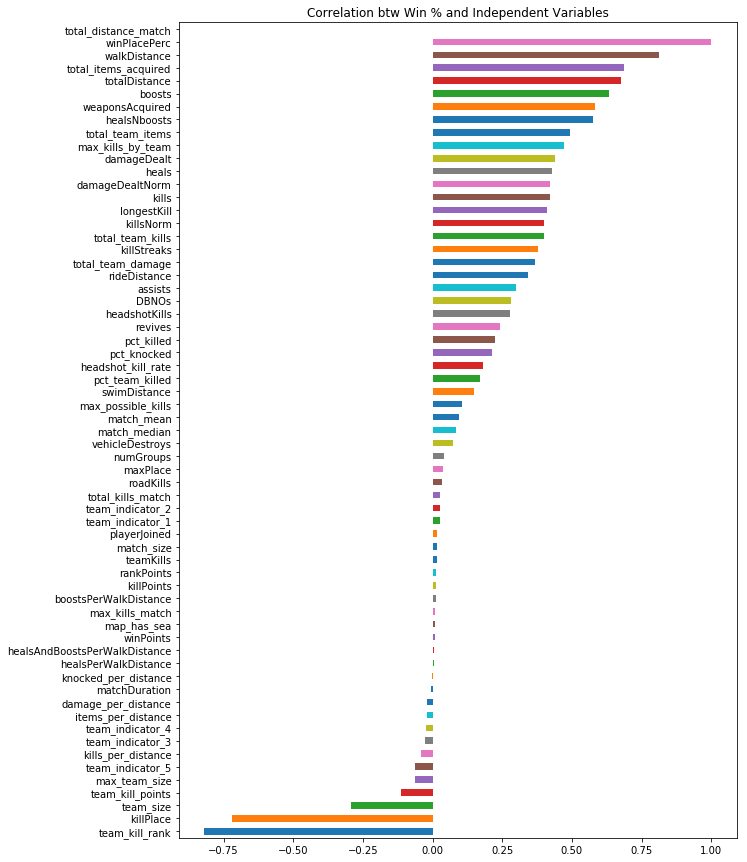

In [57]:
plt.title("Correlation btw Win % and Independent Variables")
pub_train.corr()['winPlacePerc'].sort_values().plot(kind='barh',figsize=(10,15))

# Machine Learning

In [33]:
import lightgbm as lgb

In [34]:
from sklearn.model_selection import KFold
from sklearn.metrics import mean_absolute_error

In [56]:
pub_train.shape

(4446966, 68)

In [41]:
pub_train.head()

,Id,groupId,matchId,assists,boosts,damageDealt,DBNOs,headshotKills,heals,killPlace,killPoints,kills,killStreaks,longestKill,matchDuration,matchType,maxPlace,numGroups,rankPoints,revives,rideDistance,roadKills,swimDistance,teamKills,vehicleDestroys,walkDistance,weaponsAcquired,winPoints,winPlacePerc,playerJoined,healsNboosts,totalDistance,boostsPerWalkDistance,healsPerWalkDistance,healsAndBoostsPerWalkDistance,match_mean,match_median,team_size,max_team_size,match_size,team_indicator_1,team_indicator_2,team_indicator_3,team_indicator_4,team_indicator_5,game_mode,max_possible_kills,total_items_acquired,items_per_distance,kills_per_distance,knocked_per_distance,damage_per_distance,headshot_kill_rate,max_kills_by_team,total_team_damage,total_team_kills,total_team_items,pct_killed,pct_knocked,pct_team_killed,team_kill_points,team_kill_rank,max_kills_match,total_kills_match,total_distance_match,map_has_sea
0,7f96b2f878858a,4d4b580de459be,a10357fd1a4a91,0,0,0.00,0,0,0,60,1241,0,0,0.00,1306,squad-fpp,28,26,-1,0,0.0000,0,0.00,0,0,244.80,1,1466,0.4444,96,0,244.8000,0.0,0.0,0.0,0.468364,0.4444,4,8,96,0.020833,0.062500,0.187500,0.416667,0.312500,custom,92,1,0.004085,0.000000,0.0,0.000000,NaN,4,408.75,4,5,0.000000,0.0,0.043478,5002,47.25,7,84,NaN,1
1,eef90569b9d03c,684d5656442f9e,aeb375fc57110c,0,0,91.47,0,0,0,57,0,0,0,0.00,1777,squad-fpp,26,25,1484,0,0.0045,0,11.04,0,0,1434.00,5,0,0.6400,91,0,1445.0445,0.0,0.0,0.0,0.456703,0.4000,4,10,91,0.043956,0.021978,0.230769,0.351648,0.351648,custom,87,5,0.003460,0.000000,0.0,0.063299,NaN,2,571.27,4,43,0.000000,0.0,0.045977,0,37.00,7,83,NaN,1
2,1eaf90ac73de72,6a4a42c3245a74,110163d8bb94ae,1,0,68.00,0,0,0,47,0,0,0,0.00,1318,duo,50,47,1491,0,0.0000,0,0.00,0,0,161.80,2,0,0.7755,98,0,161.8000,0.0,0.0,0.0,0.456686,0.4184,2,6,98,0.061224,0.693878,0.183673,0.000000,0.061224,duo,96,2,0.012361,0.000000,0.0,0.420272,NaN,2,214.60,2,9,0.000000,0.0,0.020833,0,32.50,9,91,NaN,1
3,4616d365dd2853,a930a9c79cd721,f1f1f4ef412d7e,0,0,32.90,0,0,0,75,0,0,0,0.00,1436,squad-fpp,31,30,1408,0,0.0000,0,0.00,0,0,202.70,3,0,0.1667,91,0,202.7000,0.0,0.0,0.0,0.495240,0.5000,1,8,91,0.054945,0.175824,0.263736,0.131868,0.373626,custom,90,3,0.014800,0.000000,0.0,0.162309,NaN,0,32.90,0,3,0.000000,0.0,0.000000,0,75.00,7,82,NaN,1
4,315c96c26c9aac,de04010b3458dd,6dc8ff871e21e6,0,0,100.00,0,0,0,45,0,1,1,58.53,1424,solo-fpp,97,95,1560,0,0.0000,0,0.00,0,0,49.75,2,0,0.1875,97,0,49.7500,0.0,0.0,0.0,0.499140,0.5000,1,2,97,0.958763,0.041237,0.000000,0.000000,0.000000,solo,96,2,0.040201,0.020101,0.0,2.010050,0.0,1,100.00,1,2,0.010417,0.0,0.010417,0,45.00,11,91,NaN,1


In [ ]:
# EXCLUDE_COLS = ['Id', 'match_mean', 'match_median', 'team_indicator_5', 'game_mode']
# CATEGORICAL_COLS = ['matchId', 'groupId']
# TARGET = 'winPlacePerc'
# TRAIN_SIZE = 0.9
# EARLY_STOP_ROUNDS = 10

In [35]:
X = pub_train[['assists', 'boosts', 'damageDealt', 'DBNOs',
       'headshotKills', 'heals', 'killPlace', 'killPoints', 'kills',
       'killStreaks', 'longestKill','matchDuration','maxPlace', 'numGroups', 'rankPoints','revives',
       'rideDistance', 'roadKills', 'swimDistance', 'teamKills',
       'vehicleDestroys', 'walkDistance', 'weaponsAcquired', 'winPoints','playerJoined','killsNorm',
           'damageDealtNorm','totalDistance','boostsPerWalkDistance','healsPerWalkDistance',
           'max_possible_kills','total_items_acquired','items_per_distance','kills_per_distance','knocked_per_distance',
          'damage_per_distance','headshot_kill_rate','max_kills_by_team','total_team_damage','total_team_kills','total_team_items',
          'pct_killed','pct_knocked','pct_team_killed','team_kill_points','team_kill_rank','max_kills_match','total_kills_match',
          'total_distance_match','map_has_sea']]

In [36]:
X.head()

,assists,boosts,damageDealt,DBNOs,headshotKills,heals,killPlace,killPoints,kills,killStreaks,longestKill,matchDuration,maxPlace,numGroups,rankPoints,revives,rideDistance,roadKills,swimDistance,teamKills,vehicleDestroys,walkDistance,weaponsAcquired,winPoints,playerJoined,killsNorm,damageDealtNorm,totalDistance,boostsPerWalkDistance,healsPerWalkDistance,max_possible_kills,total_items_acquired,items_per_distance,kills_per_distance,knocked_per_distance,damage_per_distance,headshot_kill_rate,max_kills_by_team,total_team_damage,total_team_kills,total_team_items,pct_killed,pct_knocked,pct_team_killed,team_kill_points,team_kill_rank,max_kills_match,total_kills_match,total_distance_match,map_has_sea
0,0,0,0.00,0,0,0,60,1241,0,0,0.00,1306,28,26,-1,0,0.0000,0,0.00,0,0,244.80,1,1466,96,0.00,0.0000,244.8000,0.0,0.0,92,1,0.004085,0.000000,0.0,0.000000,0.0,4,408.75,4,5,0.000000,0.0,0.043478,5002,47.25,7,84,0.0,1
1,0,0,91.47,0,0,0,57,0,0,0,0.00,1777,26,25,1484,0,0.0045,0,11.04,0,0,1434.00,5,0,91,0.00,99.7023,1445.0445,0.0,0.0,87,5,0.003460,0.000000,0.0,0.063299,0.0,2,571.27,4,43,0.000000,0.0,0.045977,0,37.00,7,83,0.0,1
2,1,0,68.00,0,0,0,47,0,0,0,0.00,1318,50,47,1491,0,0.0000,0,0.00,0,0,161.80,2,0,98,0.00,69.3600,161.8000,0.0,0.0,96,2,0.012361,0.000000,0.0,0.420272,0.0,2,214.60,2,9,0.000000,0.0,0.020833,0,32.50,9,91,0.0,1
3,0,0,32.90,0,0,0,75,0,0,0,0.00,1436,31,30,1408,0,0.0000,0,0.00,0,0,202.70,3,0,91,0.00,35.8610,202.7000,0.0,0.0,90,3,0.014800,0.000000,0.0,0.162309,0.0,0,32.90,0,3,0.000000,0.0,0.000000,0,75.00,7,82,0.0,1
4,0,0,100.00,0,0,0,45,0,1,1,58.53,1424,97,95,1560,0,0.0000,0,0.00,0,0,49.75,2,0,97,1.03,103.0000,49.7500,0.0,0.0,96,2,0.040201,0.020101,0.0,2.010050,0.0,1,100.00,1,2,0.010417,0.0,0.010417,0,45.00,11,91,0.0,1


In [37]:
y = pub_train['winPlacePerc']

In [38]:
y.head()

0    0.4444
1    0.6400
2    0.7755
3    0.1667
4    0.1875
Name: winPlacePerc, dtype: float64

In [39]:
X_test = pub_test[['assists', 'boosts', 'damageDealt', 'DBNOs',
       'headshotKills', 'heals', 'killPlace', 'killPoints', 'kills',
       'killStreaks', 'longestKill','matchDuration','maxPlace', 'numGroups', 'rankPoints','revives',
       'rideDistance', 'roadKills', 'swimDistance', 'teamKills',
       'vehicleDestroys', 'walkDistance', 'weaponsAcquired', 'winPoints','playerJoined','killsNorm',
           'damageDealtNorm','totalDistance','boostsPerWalkDistance','healsPerWalkDistance',
           'max_possible_kills','total_items_acquired','items_per_distance','kills_per_distance','knocked_per_distance',
          'damage_per_distance','headshot_kill_rate','max_kills_by_team','total_team_damage','total_team_kills','total_team_items',
          'pct_killed','pct_knocked','pct_team_killed','team_kill_points','team_kill_rank','max_kills_match','total_kills_match',
          'total_distance_match','map_has_sea']]

In [40]:
X_test.head()

,assists,boosts,damageDealt,DBNOs,headshotKills,heals,killPlace,killPoints,kills,killStreaks,longestKill,matchDuration,maxPlace,numGroups,rankPoints,revives,rideDistance,roadKills,swimDistance,teamKills,vehicleDestroys,walkDistance,weaponsAcquired,winPoints,playerJoined,killsNorm,damageDealtNorm,totalDistance,boostsPerWalkDistance,healsPerWalkDistance,max_possible_kills,total_items_acquired,items_per_distance,kills_per_distance,knocked_per_distance,damage_per_distance,headshot_kill_rate,max_kills_by_team,total_team_damage,total_team_kills,total_team_items,pct_killed,pct_knocked,pct_team_killed,team_kill_points,team_kill_rank,max_kills_match,total_kills_match,total_distance_match,map_has_sea
0,0,0,51.46,0,0,0,73,0,0,0,0.00,1884,28,28,1500,0,0.0,0,0.0,0,0,588.0,1,0,92,0.00,55.5768,588.0,0.000000,0.000000,88,1,0.001701,0.000000,0.000000,0.087517,0.000000,0,125.66,0,10,0.000000,0.00000,0.000000,0,71.50,7,85,0.0,1
1,0,4,179.10,0,0,2,11,0,2,1,361.90,1811,48,47,1503,2,4669.0,0,0.0,0,0,2017.0,6,0,96,2.08,186.2640,6686.0,0.001982,0.000991,94,12,0.001795,0.000299,0.000000,0.026787,0.000000,5,776.60,7,30,0.021277,0.00000,0.074468,0,7.00,10,88,0.0,1
2,1,0,23.40,0,0,4,49,0,0,0,0.00,1793,28,27,1565,0,0.0,0,0.0,0,0,787.8,4,0,94,0.00,24.8040,787.8,0.000000,0.005071,90,8,0.010155,0.000000,0.000000,0.029703,0.000000,8,1490.11,12,37,0.000000,0.00000,0.133333,0,25.75,8,84,0.0,1
3,0,0,65.52,0,0,0,54,0,0,0,0.00,1834,45,44,1465,0,0.0,0,0.0,0,0,1812.0,3,0,89,0.00,72.7272,1812.0,0.000000,0.000000,87,3,0.001656,0.000000,0.000000,0.036159,0.000000,0,165.52,0,8,0.000000,0.00000,0.000000,0,53.50,10,78,0.0,0
4,0,4,330.20,1,2,1,7,0,3,1,60.06,1326,28,27,1480,1,0.0,0,0.0,0,0,2963.0,4,0,95,3.15,346.7100,2963.0,0.001350,0.000337,92,9,0.003037,0.001012,0.000337,0.111441,0.666667,3,661.84,7,30,0.032609,0.01087,0.076087,0,12.00,7,86,0.0,1


In [42]:
params = {"objective" : "regression", "metric" : "mae", "max_depth": 5, "min_child_samples": 20, "reg_alpha": 0.2, "reg_lambda": 0.2,
        "num_leaves" : 33, "learning_rate" : 0.2, "subsample" : 0.9, "colsample_bytree" : 0.9, "subsample_freq ": 6}
n_fold = 10

In [43]:
folds = KFold(n_splits=n_fold, shuffle=False, random_state=42)
# Cleaning and defining parameters for LGBM
model = lgb.LGBMRegressor(**params, n_estimators = 1000, nthread = 1, n_jobs = -1)

In [44]:
prediction = np.zeros(pub_test.shape[0])
scores = []
for fold_n, (train_index, test_index) in enumerate(folds.split(X)):
    print('Fold:', fold_n)
    X_train, X_valid = X.iloc[train_index], X.iloc[test_index]
    y_train, y_valid = y.iloc[train_index], y.iloc[test_index]
    
    model.fit(X_train, y_train, 
            eval_set=[(X_train, y_train), (X_valid, y_valid)], eval_metric='mae',
            verbose=500, early_stopping_rounds=100)
    
    y_pred = model.predict(X_test, num_iteration=model.best_iteration_)
    prediction += y_pred
    
    scores.append(mean_absolute_error(y_valid, model.predict(X_valid)))
prediction /= n_fold


Fold: 0
Training until validation scores don't improve for 100 rounds.
[500]	training's l1: 0.0461146	valid_1's l1: 0.0463508
[1000]	training's l1: 0.0444022	valid_1's l1: 0.0447938
Did not meet early stopping. Best iteration is:
[1000]	training's l1: 0.0444022	valid_1's l1: 0.0447938
Fold: 1
Training until validation scores don't improve for 100 rounds.
[500]	training's l1: 0.0461072	valid_1's l1: 0.0463342
[1000]	training's l1: 0.0443624	valid_1's l1: 0.0447456
Did not meet early stopping. Best iteration is:
[1000]	training's l1: 0.0443624	valid_1's l1: 0.0447456
Fold: 2
Training until validation scores don't improve for 100 rounds.
[500]	training's l1: 0.0461291	valid_1's l1: 0.0464305
[1000]	training's l1: 0.0443892	valid_1's l1: 0.0448432
Did not meet early stopping. Best iteration is:
[1000]	training's l1: 0.0443892	valid_1's l1: 0.0448432
Fold: 3
Training until validation scores don't improve for 100 rounds.
[500]	training's l1: 0.0460396	valid_1's l1: 0.0463559
[1000]	training'

In [45]:
print(f'Mean CV: {np.mean(scores):.4f}. Std: {np.std(scores):.4f}')

Mean CV: 0.0448. Std: 0.0000


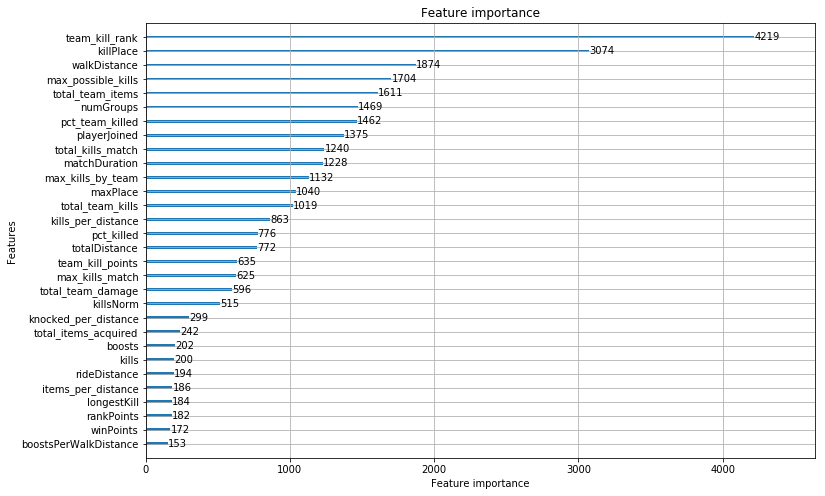

In [46]:
lgb.plot_importance(model, max_num_features=30, figsize=(12, 8));
plt.title('Feature importance');

In [49]:
len(prediction)

1934174

In [50]:
prediction

array([0.23043898, 0.96886175, 0.70159209, ..., 0.88973814, 0.86168624,
       0.05641989])

In [52]:

sub['winPlacePerc'] = np.clip(prediction, 0, 1)

In [55]:
sub.to_csv('sub.csv', index=False)